In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
anx_dep = pd.read_csv('../capstone_project/data/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')
red_care = pd.read_csv('../capstone_project/data/Indicators_of_Reduced_Access_to_Care_Due_to_the_Coronavirus_Pandemic_During_Last_4_Weeks.csv')
mental = pd.read_csv('../capstone_project/data/Mental_Health_Care_in_the_Last_4_Weeks.csv')

In [3]:
MO_initial_unemployment = pd.read_csv('../capstone_project/data/Missouri_Weekly_Report_of_Initial_Unemployment_Claims.csv')
MO_by_industry = pd.read_csv('../capstone_project/data/Missouri_Monthly_Unemployment_Claims_By_Industry.csv')
MO_by_race = pd.read_csv('../capstone_project/data/Missouri_Monthly_Unemployment_Claims_By_Race.csv')

1. What is the overall trend in reported symptoms of anxiety and depression among black women during the pandemic?

In [4]:
black_women = anx_dep[(anx_dep["Subgroup"] == "Non-Hispanic Black, single race") | (anx_dep["Subgroup"] == "Female")]

In [5]:
pandemic = black_women[black_women["Time Period Label"] == "Apr 23 - May 5, 2020"]
pre_pandemic = black_women[black_women["Time Period Label"] == "Apr 28 - May 10, 2021"]

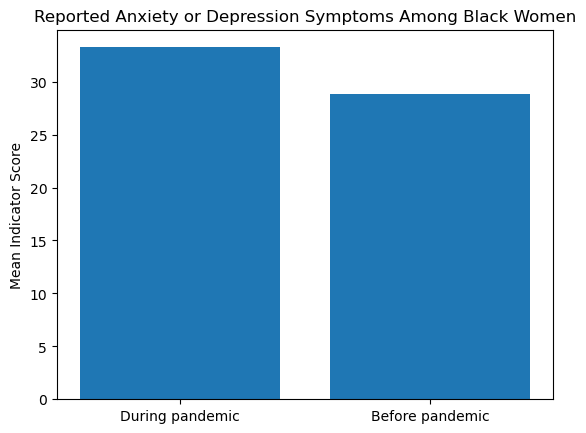

In [6]:
fig, ax = plt.subplots()
plt.bar(["During pandemic", "Before pandemic"], [pandemic["Value"].mean(), pre_pandemic["Value"].mean()])
plt.title("Reported Anxiety or Depression Symptoms Among Black Women")
plt.ylabel("Mean Indicator Score")
plt.show()

2. How does the reported frequency of symptoms of anxiety and depression among black women compare to other demographic groups during the pandemic?

In [7]:
demographic_groups = ['Hispanic or Latino', 'Non-Hispanic White, single race', 'Non-Hispanic Black, single race', 'Non-Hispanic Asian, single race', 'Non-Hispanic, other races and multiple races']
filtered_df = anx_dep[anx_dep['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder'].loc[anx_dep['Subgroup'].isin(demographic_groups)]

In [8]:
summary = filtered_df.groupby('Subgroup')['Value'].agg(['mean', 'std'])

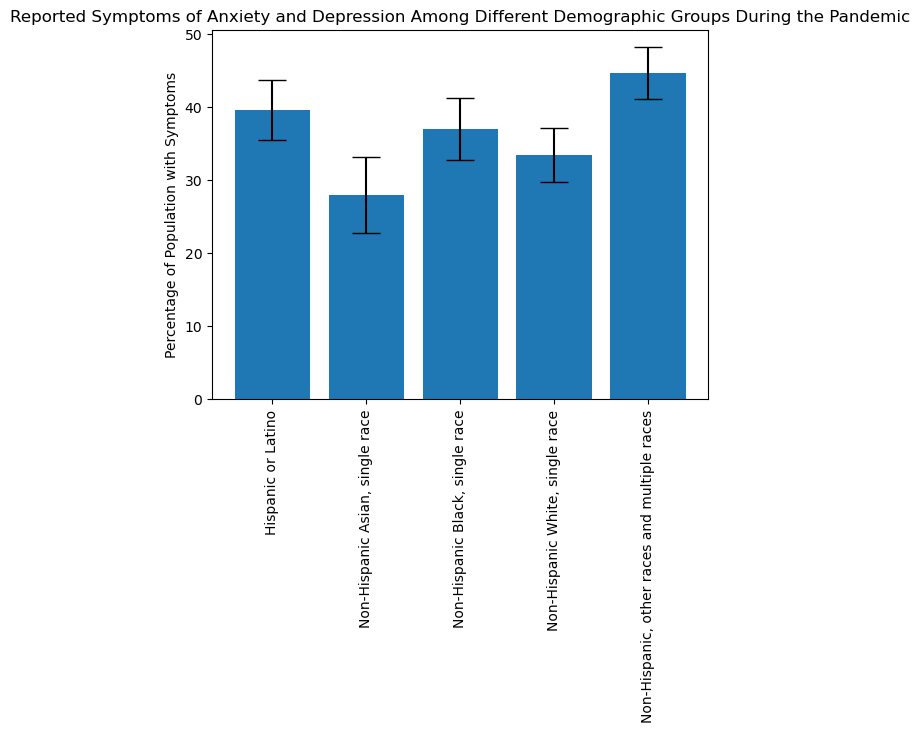

In [9]:
plt.bar(summary.index, summary['mean'], yerr=summary['std'], capsize=10)
plt.title('Reported Symptoms of Anxiety and Depression Among Different Demographic Groups During the Pandemic')
plt.ylabel('Percentage of Population with Symptoms')
plt.xticks(rotation=90)
plt.show()

3. Is there a correlation between reported symptoms of anxiety and depression among black womens access to mental healthcare?

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Reported Symptoms and Access to Mental Healthcare for Black Women')
plt.show()